Detecting edges from the images through the convolution forward pass

In [1]:
# Importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

from CNN_image_classification.layers import *

/home/dhwani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dhwani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()
/home/dhwani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


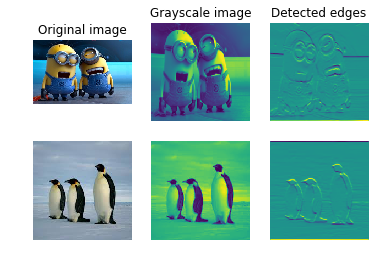

In [3]:
from scipy.misc import imread, imresize

penguin, minion = imread('index.jpeg'), imread('minion.jpg')

# Reshaping images to get it in square
d = penguin.shape[1] - penguin.shape[0]
penguin_cropped = penguin[:, d//2:-d//2, :]
minion_cropped = minion[:, d//2:-d//2, :]

img_size = 180 
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = imresize(minion_cropped, (img_size, img_size)).transpose((2, 0, 1))
x[1, :, :, :] = imresize(penguin_cropped, (img_size, img_size)).transpose((2, 0, 1))

# Setting up convolutional weights
w = np.zeros((2, 3, 3, 3))

# First convering it to greyscale images with first filter
# Setting up RGB channels for the filter
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

# Detecting horizontal edges with second filter
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

#Adding bais
b = np.array([0, 128])

#Setting pad and stride values
#Padding is required to be added in order to avoid images getting shrinked
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_noax(img, normalize=True):
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Displaying the images
plt.subplot(2, 3, 1)
imshow_noax(minion_cropped, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_noax(out[0, 0])
plt.title('Grayscale image')
plt.subplot(2, 3, 3)
imshow_noax(out[0, 1])
plt.title('Detected edges')
plt.subplot(2, 3, 4)
imshow_noax(penguin_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_noax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_noax(out[1, 1])
plt.show()